## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객 수 감소 분석

#### 중간저장 엑셀 파일 로드

In [18]:
# 판다스 사용등록
import pandas as pd

In [19]:
## 데이터 로드
df_total = pd.read_excel('../day03/data/kto_total.xlsx')
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아
1,대만,35788,41,17,37,516,36399,2010-01,아시아
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아
3,마카오,554,0,0,0,0,554,2010-01,아시아
4,태국,13374,39,13,53,4335,17814,2010-01,아시아
...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙


In [20]:
condition = df_total['국적'] == '중국'
df_china = df_total[condition]

In [21]:
df_china.reset_index(inplace=True) # 인덱스가 17, 77, 137 등으로 진행하는 것을 0부터 순차적으로 리셋

In [22]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아
...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아


#### 시각화

In [23]:
# 필요 라이브러리, 모듈 사용 등록
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path  = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [25]:
# 차트  스타일 지정
sns.set_style('darkgrid')

In [26]:
## 불필요한 경고메시지 제거
import warnings
warnings.filterwarnings('ignore')

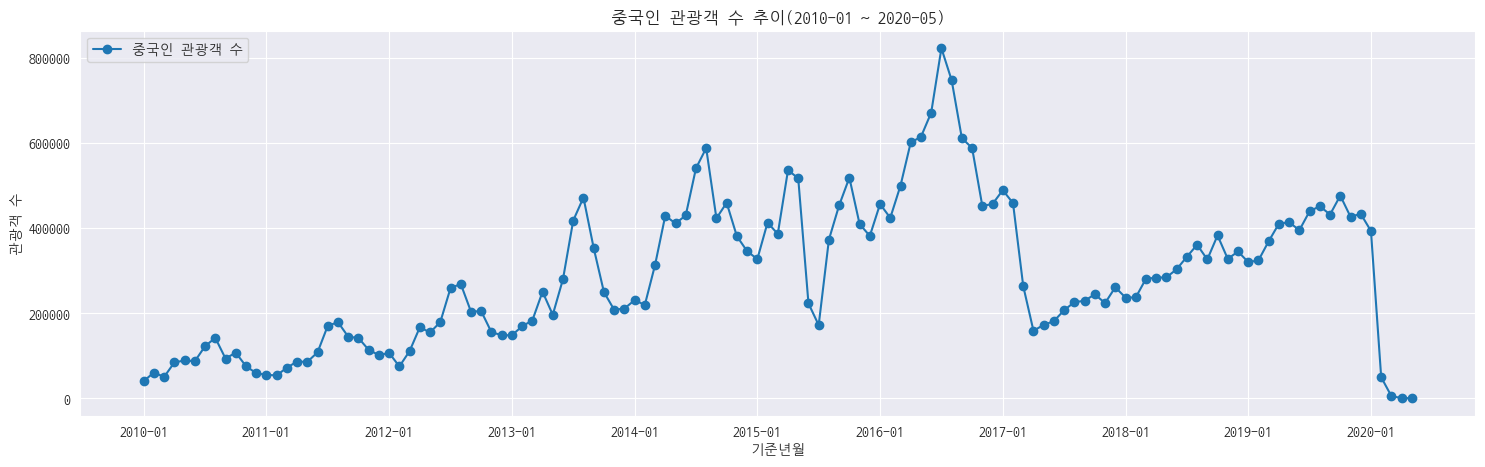

In [32]:
# 중국인 관광객 수 차트 다시
from cProfile import label


plt.figure(figsize=(18,5))
plt.plot(df_china['기준년월'], df_china['관광'], label='중국인 관광객 수', marker = 'o')
plt.title('중국인 관광객 수 추이(2010-01 ~ 2020-05)')
plt.xlabel('기준년월')
plt.ylabel('관광객 수')
plt.legend(loc='upper left')
plt.xticks([f'{yyyy}-01' for yyyy in range(2010,2021)])

plt.show()

##### 관광객수 TOP5 나라 시각화

In [33]:
countryList = ['중국', '일본', '대만', '미국', '홍콩']

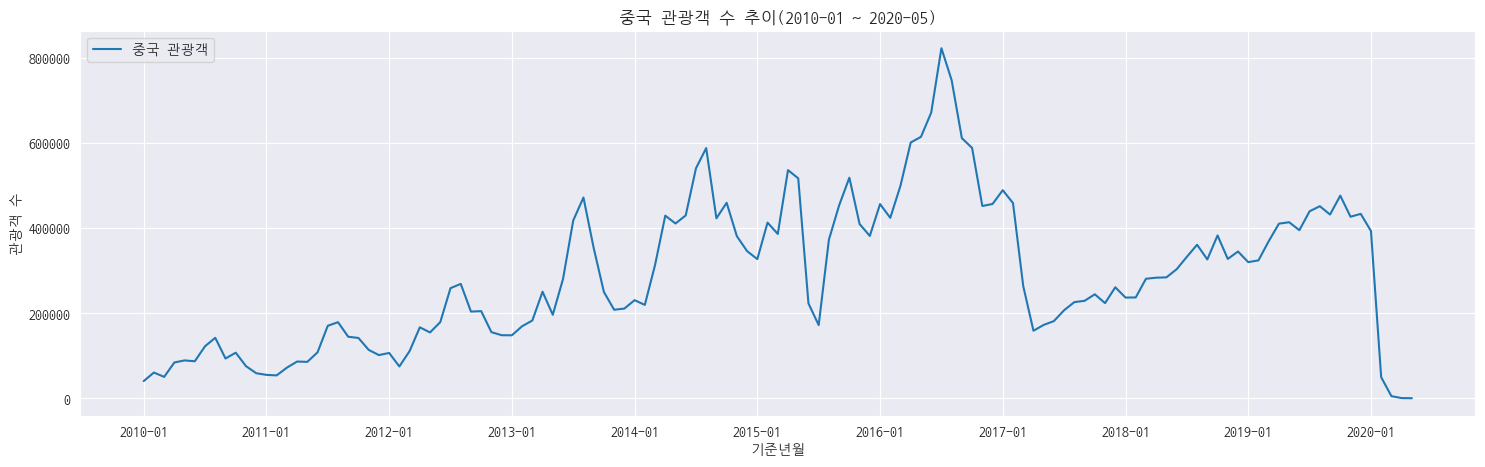

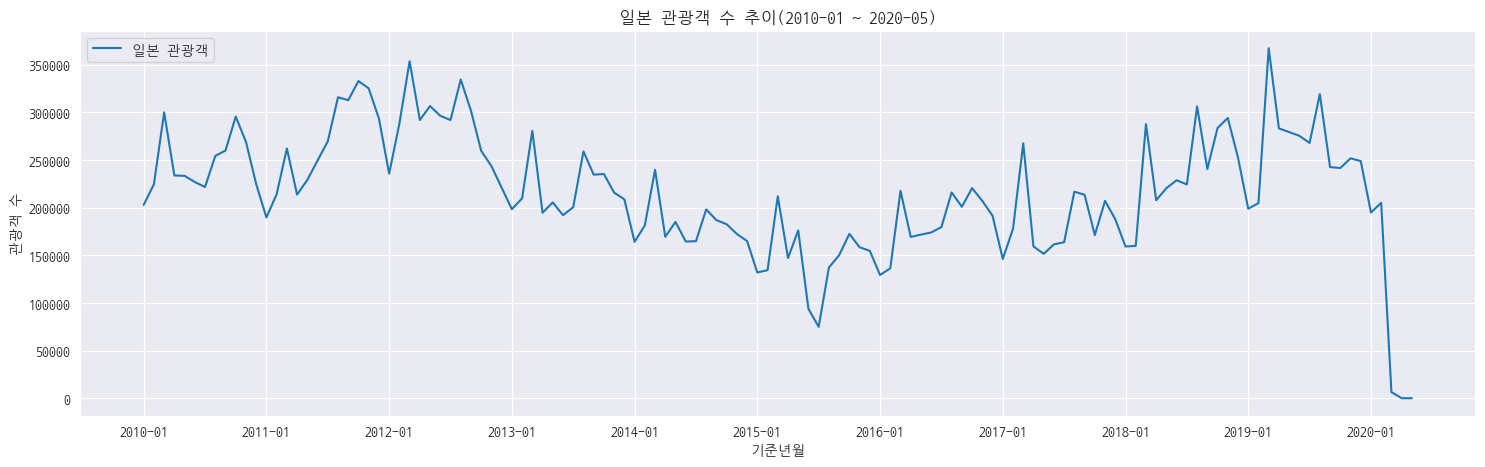

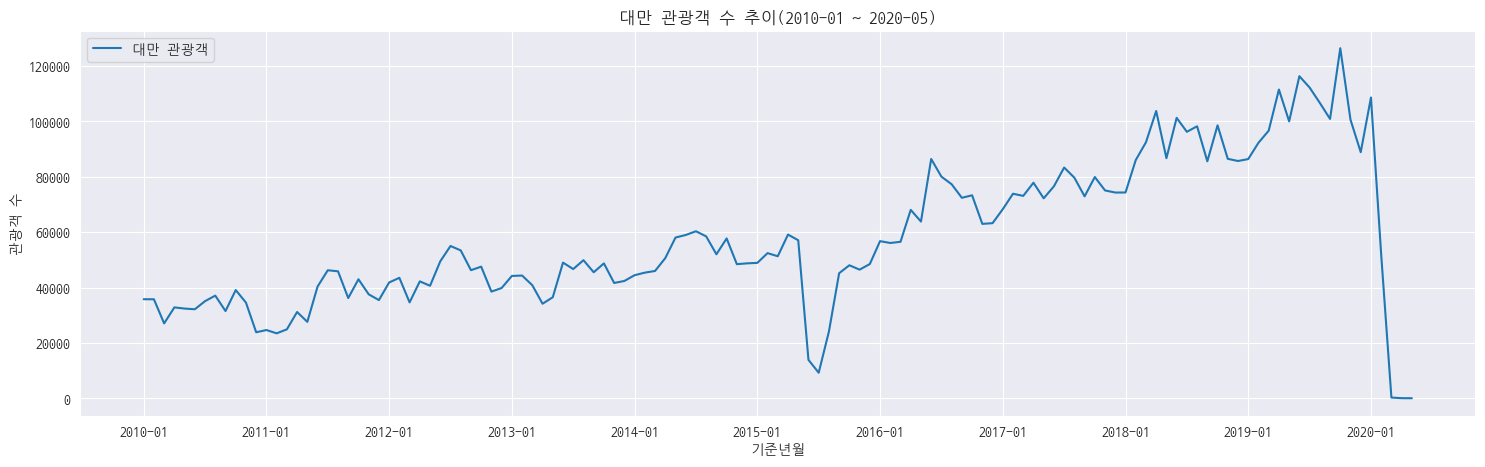

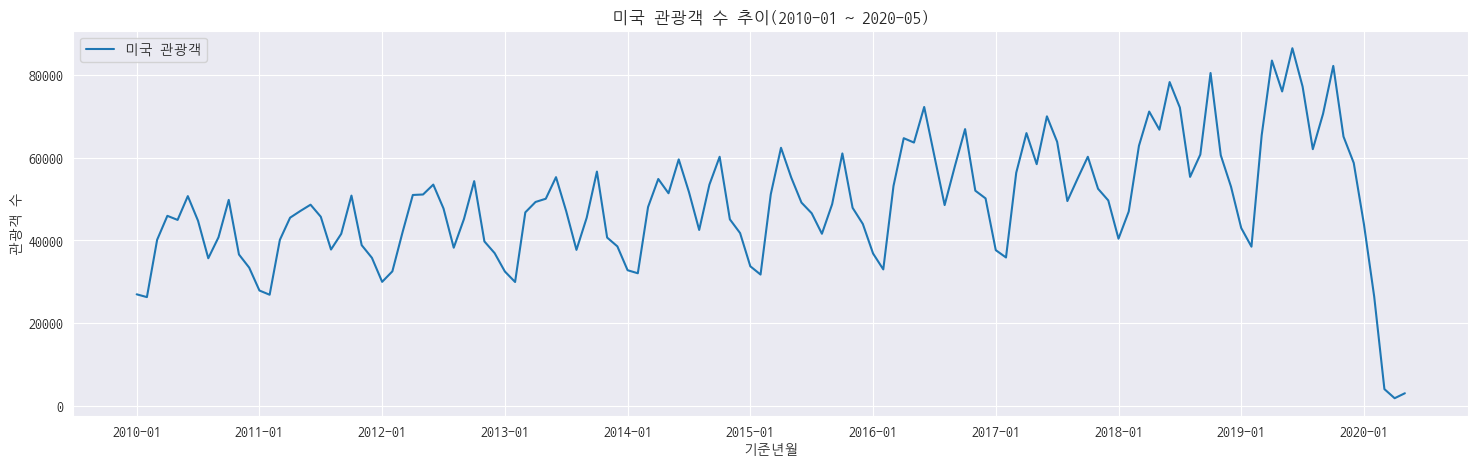

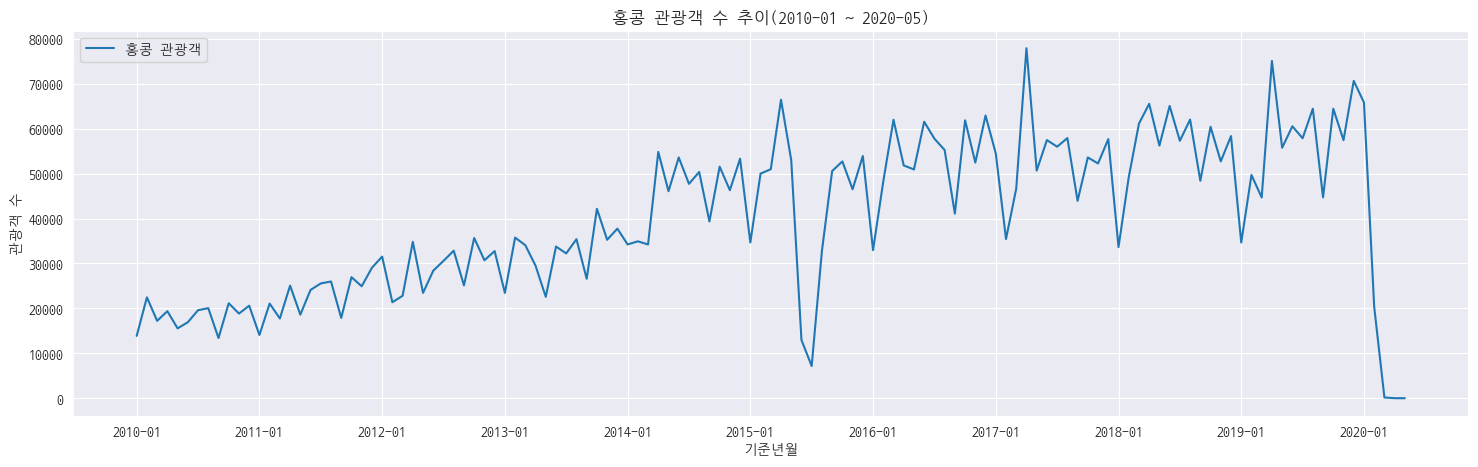

In [37]:
for country in countryList:
    # 각 나라별로 관광객 수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.figure(figsize=(18,5))
    plt.plot(df_filter['기준년월'], df_filter['관광'], label=f'{country} 관광객')
    plt.title(f'{country} 관광객 수 추이(2010-01 ~ 2020-05)')
    plt.xlabel('기준년월')
    plt.ylabel('관광객 수')
    plt.legend(loc='upper left')

    plt.xticks([f'{yyyy}-01' for yyyy in range(2010,2021)])

    plt.show()

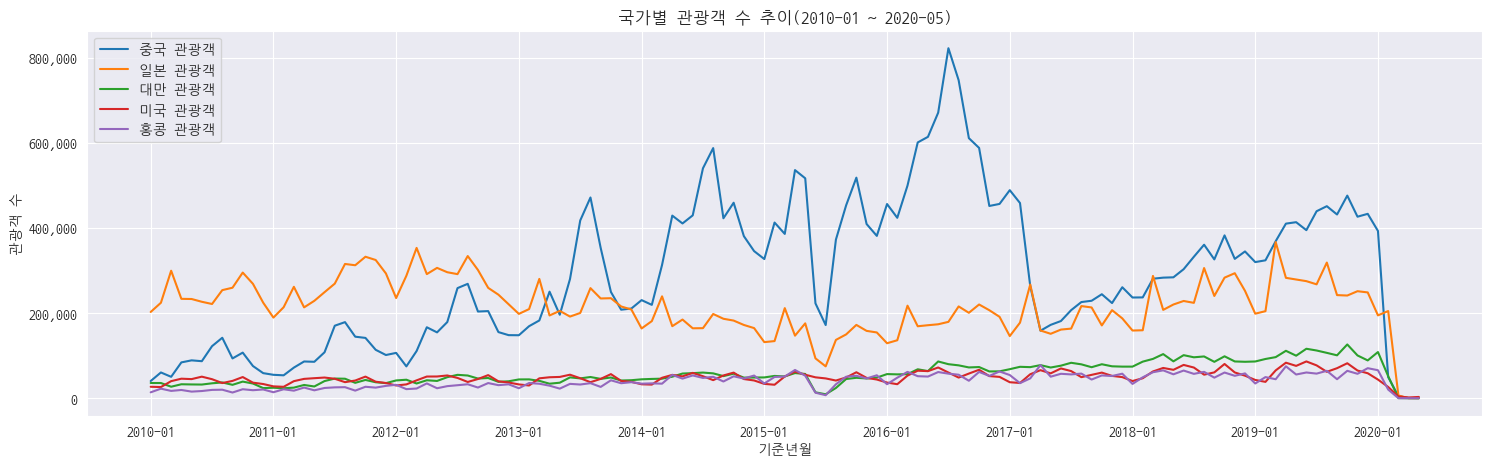

In [40]:
plt.figure(figsize=(18,5))

for country in countryList:
    # 각 나라별로 관광객 수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]


    plt.plot(df_filter['기준년월'], df_filter['관광'], label=f'{country} 관광객')
    plt.xlabel('기준년월')
    plt.ylabel('관광객 수')
    plt.legend(loc='upper left')

    plt.xticks([f'{yyyy}-01' for yyyy in range(2010,2021)])
    
plt.title('국가별 관광객 수 추이(2010-01 ~ 2020-05)')
## y축 라벨(1000단위 쉼표)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values])
plt.show()

##### 히트맵

년도와 월은 현재 하나의 컬럼으로 구성,히트맵으로 사용 시 년도와 월을 분리해야 함 

In [41]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아
1,대만,35788,41,17,37,516,36399,2010-01,아시아
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아
3,마카오,554,0,0,0,0,554,2010-01,아시아
4,태국,13374,39,13,53,4335,17814,2010-01,아시아
...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙


In [51]:
## 년도, 월 분리 '2010-01' slice(0,4):2010, slice(5,7):01
df_total['년도'] = df_total['기준년월'].str.slice(0,4)
df_total['월'] = df_total['기준년월'].str.slice(5,7)

In [52]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,2010,01
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,2020,05
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2020,05
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,2020,05


In [54]:
# 기존의 df_china에는 년도, 월 컬럼이 없으므로 다시 df_total에서 필터링 새로 할당
condition = df_total['국적'] == '중국'
df_china = df_total[condition]

In [55]:
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,2010,05
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,2020,03
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,2020,04


In [62]:
## 피벗테이블로 구성
df_chinaPivot = df_china.pivot_table(values='관광', index= '년도', columns= '월', aggfunc= 'sum')

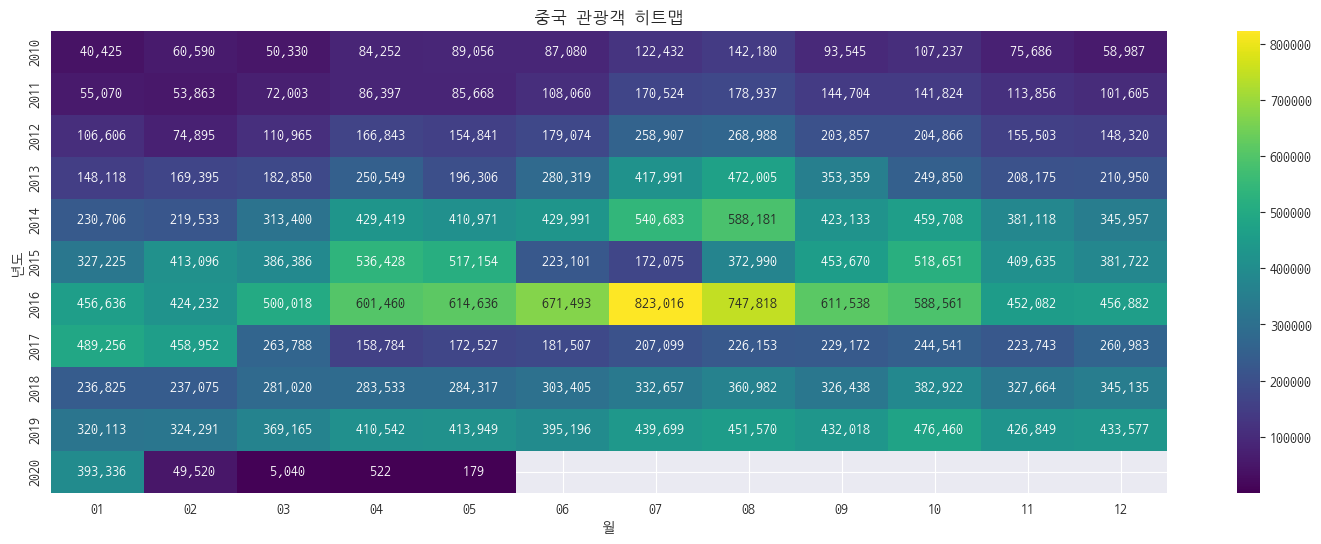

In [80]:
## 히트맵
plt.figure(figsize=(18,6))
ax = sns.heatmap(df_chinaPivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('중국 관광객 히트맵')

for t in ax.texts:
    t.set_text(f'{int(t.get_text()): ,d}') # 1000단위 쉼표 표시

plt.show()

In [82]:
countryList = ['중국', '일본', '대만', '미국', '홍콩']

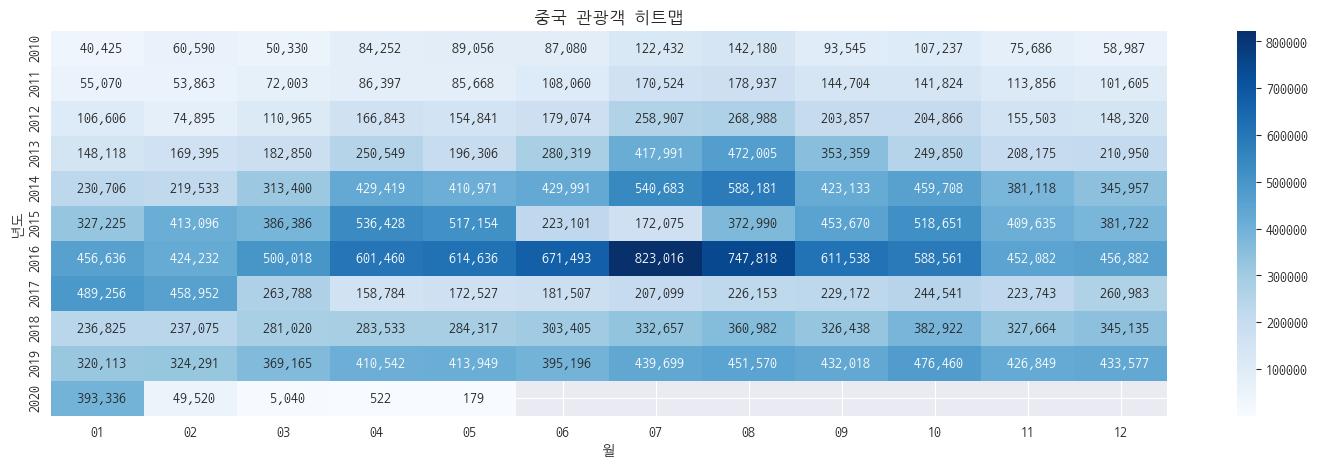

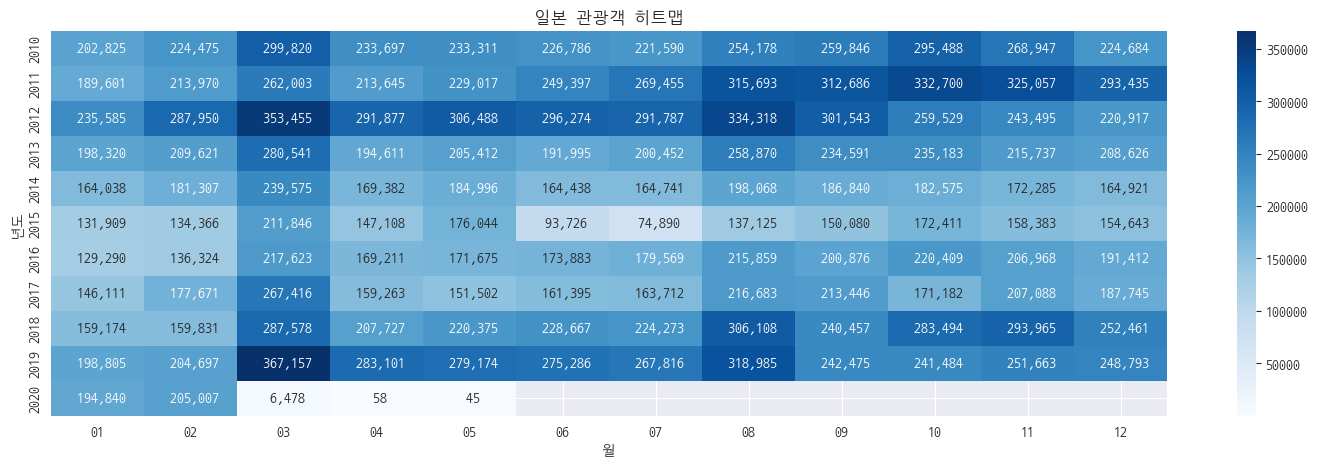

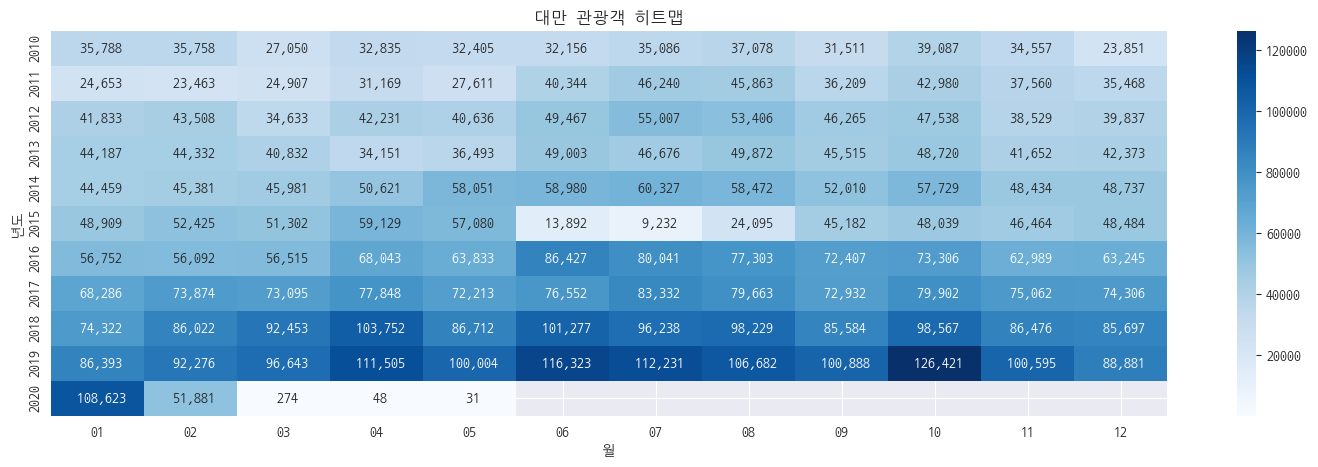

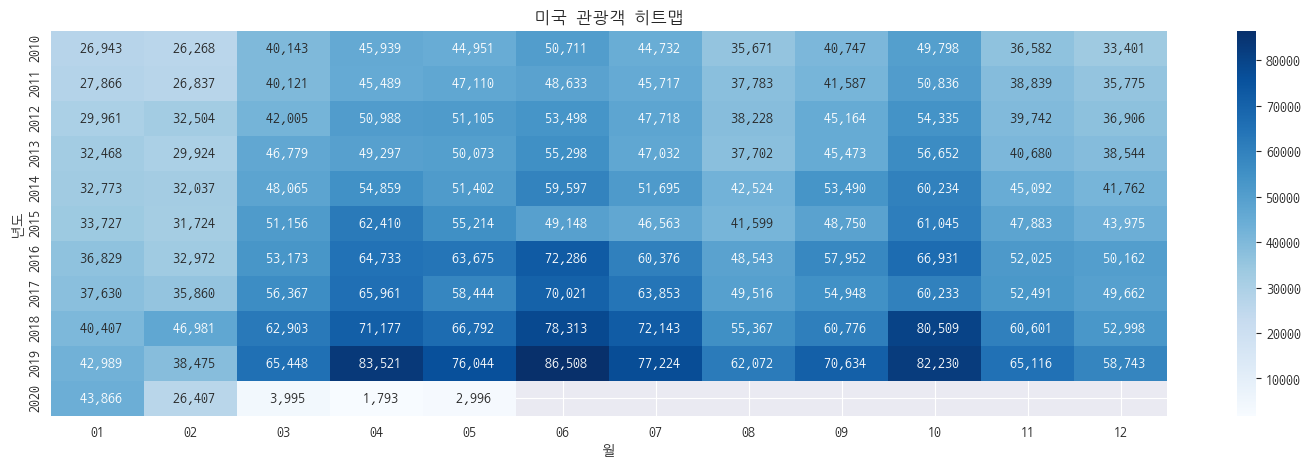

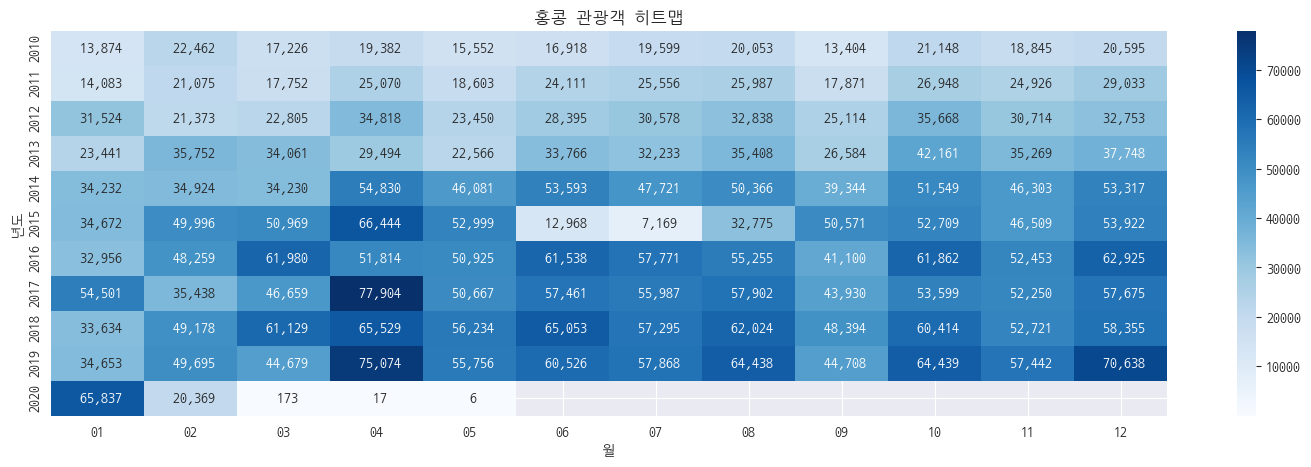

In [85]:
for country in countryList:
    # 각 나라별로 관광객 수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.figure(figsize=(18,5))
    df_pivot = df_filter.pivot_table(values='관광', index='년도', columns= '월', aggfunc= 'sum')
    ax = sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Blues')
    plt.title(f'{country} 관광객 히트맵')

    for t in ax.texts:
        t.set_text(f'{int(t.get_text()): ,d}') # 1000단위 쉼표 표시
    plt.show()

##### 시각화 차트 , 히트맵으로 분석

- 2010년 이후로 꾸준히 증가
- 2017년 초 큰 폭으로 감소
- 여름에 관광객 수가 피크, 2015년 여름만 큰 폭으로 감소
- 2020년 초 관광객 수가 0에 수렴할 정도로 급감

##### 인터넷 검색 > 구글링
1. 2015년 여름 관광객 수 감소 이유 검색, '중국인 관광객' 검색, 도구 > 기간 설정 날짜
    - 메르스 발병으로 인한 관광객 감소, TOP5의 미국 외 모든 나라에서 동일하게 발생
2. 2017년 관광객 수 감소
    - 사드(THAAD) 보복, 미국에서 사드를 한국에 배치하자 이에 대한 반발로 중국만 관광객 급감 
3. 2020년 3월부터의 감소
    - 코로나 바이러스 창궐로 인한 감소, 모든나라 동일